### Import all necessary libraries and CSV

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100) 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.dummy import DummyRegressor


import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('datasets/train_formodel_v1.csv')
test = pd.read_csv('datasets/test_clean.csv')

### Scaling

In [3]:
train.head()

,id,lotarea,lotshape,utilities,landslope,overallqual,overallcond,masvnrarea,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bedroomabvgr,kitchenabvgr,kitchenqual,functional,fireplacequ,garagefinish,garagearea,garagequal,garagecond,paveddrive,poolarea,poolqc,fence,mosold,saleprice,totalporch,totalbaths,remod,age_blt,age_garage,age_remod,nhood_Blmngtn,nhood_Blueste,nhood_BrDale,nhood_BrkSide,nhood_ClearCr,nhood_CollgCr,nhood_Crawfor,nhood_Edwards,nhood_Gilbert,nhood_Greens,nhood_GrnHill,nhood_IDOTRR,nhood_Landmrk,nhood_MeadowV,nhood_Mitchel,nhood_NAmes,nhood_NPkVill,nhood_NWAmes,nhood_NoRidge,nhood_NridgHt,nhood_OldTown,nhood_SWISU,nhood_Sawyer,nhood_SawyerW,nhood_Somerst,nhood_StoneBr,nhood_Timber,nhood_Veenker,rstyle_Gable,rstyle_Hip,fd_BrkTil,fd_CBlock,fd_PConc,hstyle_2s,btype_1Fam,btype_2Fam,btype_twnh,mvtype_BrkFace,mvtype_None,mvtype_Stone,gtype_Attchd,gtype_BuiltIn,gtype_Detchd,gtype_NA,newhouse,mainrd,railway,park
0,109,13517.0,3,4,3,6,8,289.0,3,3,1,6,533.0,1,0.0,192.0,725.0,1,5,725.0,754.0,0.0,1479.0,3,1,4,7,0,2,475.0,3,3,3,0.0,0,0,3,130500.0,44.0,2.5,1,34,34,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0
1,544,11492.0,3,4,3,7,5,132.0,4,3,1,6,637.0,1,0.0,276.0,913.0,1,5,913.0,1209.0,0.0,2122.0,4,1,4,7,3,2,559.0,3,3,3,0.0,0,0,4,220000.0,74.0,3.5,1,13,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2,153,7922.0,4,4,3,5,7,0.0,3,3,1,6,731.0,1,0.0,326.0,1057.0,1,5,1057.0,0.0,0.0,1057.0,3,1,4,7,0,1,246.0,3,3,3,0.0,0,0,1,109000.0,52.0,2.0,1,57,57,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,318,9802.0,4,4,3,5,5,0.0,4,3,1,1,0.0,1,0.0,384.0,384.0,1,5,744.0,700.0,0.0,1444.0,3,1,3,7,0,3,400.0,3,3,3,0.0,0,0,4,174000.0,100.0,2.5,1,4,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0
4,255,14235.0,3,4,3,6,8,0.0,2,4,1,1,0.0,1,0.0,676.0,676.0,1,5,831.0,614.0,0.0,1445.0,3,1,3,7,0,1,484.0,3,3,1,0.0,0,0,3,138500.0,59.0,2.0,1,110,53,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [4]:
features = [col for col in train if col != 'saleprice']

X = train[features]
y = train['saleprice']

In [5]:
toscale = [
    "lotarea",
    "masvnrarea",
    "bsmtfinsf1",
    "bsmtfinsf2",
    "bsmtunfsf",
    "totalbsmtsf",
    "1stflrsf",
    "2ndflrsf",
    "lowqualfinsf",
    "grlivarea",
    "garagearea",
    "poolarea",
    "totalporch",
    "age_blt",
    "age_garage",
    "age_remod",
    "bedroomabvgr",
    "kitchenabvgr",
    "totalbaths",
    "lotshape",
    "utilities",
    "landslope",
    "overallqual",
    "overallcond",
    "bsmtqual",
    "bsmtcond",
    "bsmtexposure",
    "bsmtfintype1",
    "bsmtfintype2",
    "kitchenqual",
    "functional",
    "fireplacequ",
    "garagefinish",
    "garagequal",
    "garagecond",
    "paveddrive",
    "poolqc",
    "electrical"
]

ss = StandardScaler()
scaled_col = ss.fit_transform(train[toscale])
scaled_col = pd.DataFrame(scaled_col, columns=train[toscale].columns)

for i in toscale:
    train.drop(i, axis=1, inplace=True)
train = train.join(scaled_col)

scaled_col_test = ss.transform(test[toscale])
scaled_col_test = pd.DataFrame(scaled_col_test, columns=test[toscale].columns)

for j in toscale:
    test.drop(j, axis=1, inplace=True)
test = test.join(scaled_col_test)

In [6]:
scaled_col

,lotarea,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,garagearea,poolarea,totalporch,age_blt,age_garage,age_remod,bedroomabvgr,kitchenabvgr,totalbaths,lotshape,utilities,landslope,overallqual,overallcond,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,kitchenqual,functional,fireplacequ,garagefinish,garagequal,garagecond,paveddrive,poolqc,electrical
0,0.528390,1.112216,0.216556,-0.290884,-0.843438,-0.768828,-1.150170,0.999218,-0.108057,-0.033745,0.009893,-0.059702,-0.871106,-0.068877,-0.230466,-0.885885,0.188982,-0.204724,0.348104,-1.059457,0.029659,0.215793,-0.076596,2.206173,-0.542071,0.123717,-0.584142,1.147503,-0.290814,0.729260,0.229959,-0.975652,0.308944,0.272356,0.264076,0.311213,-0.057766,0.284978
1,0.221965,0.199016,0.453008,-0.290884,-0.654696,-0.328333,-0.654174,2.068755,-0.108057,1.290041,0.401594,-0.059702,-0.682276,-0.764573,-0.279091,-0.552786,1.398469,-0.204724,1.590122,-1.059457,0.029659,0.215793,0.626852,-0.509117,0.568091,0.123717,-0.584142,1.147503,-0.290814,0.729260,0.229959,0.685308,0.308944,0.272356,0.264076,0.311213,-0.057766,0.284978
2,-0.318250,-0.568771,0.666724,-0.290884,-0.542350,0.009067,-0.274262,-0.773158,-0.108057,-0.902544,-1.057959,-0.059702,-0.820752,0.693075,-0.179632,-0.981056,0.188982,-0.204724,-0.272904,0.714679,0.029659,0.215793,-0.780044,1.301076,-0.542071,0.123717,-0.584142,1.147503,-0.290814,0.729260,0.229959,-0.975652,-0.804995,0.272356,0.264076,0.311213,-0.057766,0.284978
3,-0.033767,-0.568771,-0.995260,-0.290884,-0.412028,-1.567811,-1.100043,0.872284,-0.108057,-0.105802,-0.339840,-0.059702,-0.518623,-1.062728,-0.298982,-0.981056,0.188982,-0.204724,0.348104,0.714679,0.029659,0.215793,-0.780044,-0.509117,0.568091,0.123717,-0.584142,-1.205407,-0.290814,-0.776309,0.229959,-0.975652,1.422883,0.272356,0.264076,0.311213,-0.057766,0.284978
4,0.637038,-0.568771,-0.995260,-0.290884,0.244076,-0.883638,-0.870513,0.670129,-0.108057,-0.103743,0.051861,-0.059702,-0.776691,2.448878,-0.188472,-0.314859,0.188982,-0.204724,-0.272904,-1.059457,0.029659,0.215793,-0.076596,2.206173,-1.652233,1.871107,-0.584142,-1.205407,-0.290814,-0.776309,0.229959,-0.975652,-0.804995,0.272356,0.264076,-3.426998,-0.057766,0.284978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,0.215458,-0.568771,1.303325,-0.290884,0.686722,1.946775,1.496022,-0.773158,-0.108057,0.478887,0.219733,-0.059702,0.589182,-1.162113,-0.303403,-1.076227,0.188982,-0.204724,0.969113,-1.059457,0.029659,0.215793,1.330300,-0.509117,0.568091,0.123717,1.274946,1.147503,-0.290814,0.729260,0.229959,1.238962,1.422883,0.272356,0.264076,0.311213,-0.057766,0.284978
2044,0.350588,-0.568771,-0.399583,-0.290884,0.071062,-0.450172,-0.791365,-0.773158,-0.108057,-1.306062,0.308332,-0.059702,-0.153551,1.090615,-0.199523,1.683732,-2.229990,-0.204724,-1.514921,-1.059457,0.029659,0.215793,-1.483492,-0.509117,-0.542071,0.123717,-0.584142,0.206339,-0.290814,-0.776309,0.229959,-0.975652,-0.804995,0.272356,0.264076,0.311213,-0.057766,0.284978
2045,-0.373331,-0.568771,-0.995260,-0.290884,0.738401,-0.368165,0.029140,0.968660,-0.108057,0.859759,-0.610300,-0.059702,-1.148058,1.488156,-0.128797,1.683732,0.188982,-0.204724,-0.893913,0.714679,0.029659,0.215793,-0.076596,0.395980,-0.542071,0.123717,-0.584142,-1.205407,-0.290814,-0.776309,0.229959,0.685308,-0.804995,-1.118630,-1.137031,0.311213,-0.057766,0.284978
2046,0.056723,-0.568771,-0.642856,4.253624,-0.612005,0.344124,0.103011,-0.773158,-0.108057,-0.608141,-0.834130,-0.059702,0.922783,0.560562,-0.188472,1.398219,0.188982,-0.204724,-0.272904,0.714679,0.029659,0.215793,-1.483492,-0.509117,-0.542071,0.123717,-0.584142,-0.264243,0.761460,-0.776309,0.229959,1.238962,-0.804995,0.272356,0.264076,0.311213,-0.057766,0.284978


### Polynomial Features

In [7]:
polyft = PolynomialFeatures(include_bias=False)
X_poly = polyft.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=polyft.get_feature_names(features))

test_poly = polyft.transform(test) 
test_poly = pd.DataFrame(test_poly, columns=polyft.get_feature_names(features))

In [8]:
train_poly = X_poly.join(train['saleprice'])

## Modelling

#### Define functions for models - Training Set

In [9]:
# linear regression

def linear_reg(X, y, plotreg=False, plotcf=False, plotresd=False, save=False):

    """split train/test data"""
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    """instantiate model"""
    lr = LinearRegression()
    """model score evaluation"""
    lr_score = cross_val_score(lr, X_train, y_train, cv=10)

    print(f"Linear Regression cross val score: {lr_score}")
    print(f"Linear Regression cross val average: {(lr_score).mean()}")
    print(f"Linear Regression cross val S.D: {np.std(lr_score)}")
    print("")

    """model fitting & evaluation"""
    lr_model = lr.fit(X_train, y_train)
    pred = lr_model.predict(X_test)

    print(f"Linear Regression prediction score: {lr_model.score(X_test, y_test)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(pred, y_test))}")
    print("==========")
    print("")

    """plot model"""
    if plotreg == True:
        plt.figure(figsize=(10, 5))
        sns.regplot(y_test, pred)
        plt.title("Linear regression prediction", fontsize=20)
        plt.xlabel("Predicted Price", fontsize=12)
        plt.ylabel("Real Price", fontsize=12)
    
    if save==True: 
        plt.tight_layout()
        plt.savefig('images/linear_reg.png', transparent=True)
        
    """plot residuals"""
    if plotresd == True:
        plt.figure(figsize=(10, 5))
        ax = sns.scatterplot(y_test, y_test-pred)
        ax.axhline(y=0, c='red')
        plt.title("Residuals - Linear", fontsize=20)
        plt.xlabel("Actual Price", fontsize=12)
        plt.ylabel("Residuals", fontsize=12)
        
    if save==True: 
        plt.tight_layout()
        plt.savefig('images/linear_residual.png', transparent=True)    
        

    """feature coefficients"""
    if plotcf == True:
        highest_coefs = pd.DataFrame(
            {
                "feature": X_train.columns,
                "coef": lr.coef_,
                "abs_coef": np.abs(lr.coef_),
            }
        )
        highest_coefs.sort_values("abs_coef", inplace=True, ascending=False)
        plt.figure(figsize=(14, 20))
        sns.barplot(y="feature", x="coef", data=highest_coefs, palette="Blues_d")
        plt.title("Linear Reg Coefficient Ranking", fontsize=14)

In [10]:
# Ridge regression

def ridge_reg(X, y, plotreg=False, plotcf=False, plotresd=False, save=False):
    
    """split train/test data"""
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    '''instantiate model'''
    ridge_alpha = np.logspace(0,5,100)
    ridge = RidgeCV(ridge_alpha, cv=10)
    ridge.fit(X_train, y_train)

    '''optimal alpha'''
    opt_ridge = Ridge(ridge.alpha_)    
    
    """model score evaluation"""     
    opt_ridge_score = cross_val_score(opt_ridge, X_train, y_train, cv=10)
    
    print(f'Optimal alpha: {ridge.alpha_}')
    print(f'Ridge Regression cross val score: {opt_ridge_score}')
    print(f'Ridge Regression cross val average: {(opt_ridge_score).mean()}')
    print(f'Ridge Regression cross val S.D: {np.std(opt_ridge_score)}')
    print("")

    '''model fitting & evaluation'''
    opt_ridge.fit(X_train, y_train)
    pred = opt_ridge.predict(X_test)

    print(f'Ridge Regression prediction score: {opt_ridge.score(X_test, y_test)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(pred, y_test))}')
    print("==========")
    print("")

    """plot model"""
    if plotreg == True:
        plt.figure(figsize=(10, 5))
        sns.regplot(y_test, pred)
        plt.title("Ridge regression prediction", fontsize=20)
        plt.xlabel("Predicted Price", fontsize=12)
        plt.ylabel("Actual Price", fontsize=12)
    
    if save==True: 
        plt.tight_layout()
        plt.savefig('images/ridge_reg.png', transparent=True)
        
    """plot residuals"""
    if plotresd == True:
        plt.figure(figsize=(10, 5))
        ax = sns.scatterplot(y_test, y_test-pred)
        ax.axhline(y=0, c='red')
        plt.title("Residuals - Ridge", fontsize=20)
        plt.xlabel("Actual Price", fontsize=12)
        plt.ylabel("Residuals", fontsize=12)

    if save==True: 
        plt.tight_layout()
        plt.savefig('images/ridge_residual.png', transparent=True)
    
    """feature coefficients"""
    if plotcf == True: 
        opt_ridge_coefs = pd.DataFrame(
            {
                "feature": X_train.columns,
                "coef": opt_ridge.coef_,
                "abs_coef": np.abs(opt_ridge.coef_),
            }
        )
        opt_ridge_coefs.sort_values("abs_coef", inplace=True, ascending=False)
        plt.figure(figsize=(14, 30))
        sns.barplot(y="feature", x="coef", data=opt_ridge_coefs, palette="Blues_d")
        plt.title("Ridge Coefficient Ranking", fontsize=14)

In [11]:
# Lasso regression

def lasso_reg(X, y, plotreg=False, plotcf=False, plotresd=False, save=False):


    """split train/test data"""
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    """instantiate model"""
    lasso = LassoCV(n_alphas=100, cv=10)
    lasso.fit(X_train, y_train)

    """optimal alpha"""
    opt_lasso = Lasso(lasso.alpha_)

    """model score evaluation"""
    opt_lasso_score = cross_val_score(opt_lasso, X_train, y_train, cv=10)

    print(f"Optimal alpha: {lasso.alpha_}")
    print(f"Lasso Regression cross val score: {opt_lasso_score}")
    print(f"Lasso Regression cross val average: {(opt_lasso_score).mean()}")
    print(f"Lasso Regression cross val S.D: {np.std(opt_lasso_score)}")
    print("")

    """model fitting & evaluation"""
    opt_lasso.fit(X_train, y_train)
    pred = opt_lasso.predict(X_test)

    print(f"Lasso Regression prediction score: {opt_lasso.score(X_test, y_test)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(pred, y_test))}")
    print("")

    """plot model"""
    if plotreg == True:
        plt.figure(figsize=(10, 5))
        sns.regplot(y_test, pred)
        plt.title("Lasso regression prediction", fontsize=20)
        plt.xlabel("Predicted Price", fontsize=12)
        plt.ylabel("Actual Price", fontsize=12)
        
    if save==True: 
        plt.tight_layout()
        plt.savefig('images/lasso_reg.png', transparent=True)    
    
    """plot residuals"""
    if plotresd == True:
        plt.figure(figsize=(10, 5))
        ax = sns.scatterplot(y_test, y_test-pred)
        ax.axhline(y=0, c='red')
        plt.title("Residuals - Lasso", fontsize=20)
        plt.xlabel("Actual Price", fontsize=12)
        plt.ylabel("Residuals", fontsize=12)

    if save==True: 
        plt.tight_layout()
        plt.savefig('images/lasso_residual.png', transparent=True)
        
    """feature coefficients"""
    print(
        f"Num features zeroed out: {np.sum((opt_lasso.coef_==0))}"
    )
    print(
        f"Percent features zeroed out: {round(np.sum((opt_lasso.coef_==0))/float(X.shape[1])*100)}%"
    )
    print(
        f"Features zeroed out: {X.columns[(opt_lasso.coef_==0).ravel().tolist()]}"
    )
    
    print("==========")
    print("")
    
    if plotcf == True:     
        opt_lasso_coefs = pd.DataFrame(
            {
                "feature": X_train.columns,
                "coef": opt_lasso.coef_,
                "abs_coef": np.abs(opt_lasso.coef_),
            }
        )
        opt_lasso_coefs.sort_values("abs_coef", inplace=True, ascending=False)
        plt.figure(figsize=(14, 20))
        sns.barplot(y="feature", x="coef", data=opt_lasso_coefs, palette="Blues_d")
        plt.title("Lasso Coefficient Ranking", fontsize=14)


#### Define functions for models - Test Set (For Kaggle)

In [12]:
# linear regression


def linear_test(X, y, test_set):

    """instantiate model"""
    lr = LinearRegression()

    """model fitting & evaluation"""
    lr_model = lr.fit(X, y)
    pred = lr_model.predict(test_set)
    
    """save data"""
    result = test[["id"]].join(pd.DataFrame(pred, columns=["saleprice"]))
    return result

    


def ridge_test(X, y, test_set):

    """instantiate model"""
    ridge_alphas = np.logspace(0, 5, 200)
    ridge = RidgeCV(alphas=ridge_alphas, cv=10)
    ridge.fit(X, y)

    """optimal alpha"""
    print("Optimal Ridge Alpha: ", ridge.alpha_)
    opt_ridge = Ridge(alpha=ridge.alpha_)
    opt_ridge.fit(X, y)
    pred = opt_ridge.predict(test_set)
    

    '''create df for kaggle'''
    result = test[["id"]].join(pd.DataFrame(pred, columns=["saleprice"]))
    return result


def lasso_test(X, y, test_set):
    
    '''instantiate model'''
    lasso = LassoCV(n_alphas=500, cv=10)
    lasso.fit(X, y)
    
    '''optimal alpha'''
    print('Optimal Lasso Alpha: ', lasso.alpha_)
    opt_lasso = Lasso(alpha=lasso.alpha_)
    opt_lasso.fit(X,y)
    pred = opt_lasso.predict(test_set)

    
    '''create df for kaggle'''
    result = test[['id']].join(pd.DataFrame(pred,columns=['saleprice']))
    return result

### Baseline scores - using DummyRegressor

In [13]:
train.shape

(2048, 92)

In [14]:
baseline = DummyRegressor()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

baseline.fit(X_train, y_train)

baseline_pred = baseline.predict(X_test)

print(f"Baseline prediction score: {baseline.score(X_test, y_test)}")
print(f"RMSE: {np.sqrt(mean_squared_error(baseline_pred, y_test))}")

Baseline prediction score: -2.3392769681551684e-05
RMSE: 80473.84348993153


### Iteration 1 - using all features

At a glance, it is strange that the r2 is so high, as we have not done much yet. 

Comparing the training vs hold out test data scores, there seems to be overfitting as there is large variability when comparing the training vs test r2 scores. 

We can further tune the models by normalizing, and manual feature selection.

Linear Regression cross val score: [0.92142793 0.92041198 0.92180258 0.89667108 0.85397716 0.92244611
 0.90879827 0.91545455 0.89427034 0.89967399]
Linear Regression cross val average: 0.9054933986713148
Linear Regression cross val S.D: 0.020078801628381757

Linear Regression prediction score: 0.8976413803230551
RMSE: 25746.125078624493



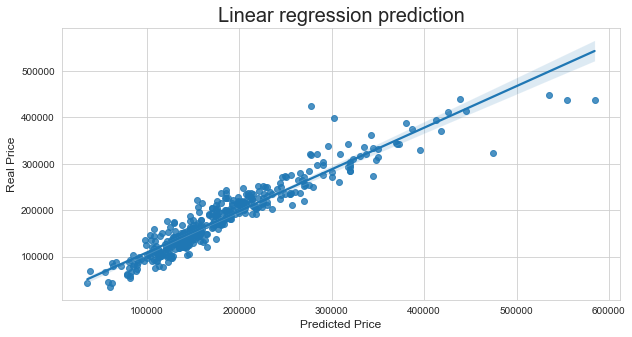

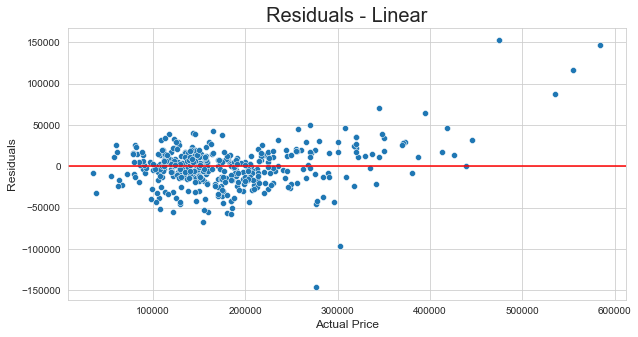

In [15]:
linear_reg(X, y, plotreg=True, plotresd=True)

In [16]:
result = linear_test(X,y,test) #HELPPPPPPPPPPPP
result.to_csv('datasets/lr_v1.csv', index=False)
result = ridge_test(X,y,test)
result.to_csv('datasets/ridge_v1.csv', index=False)
result = lasso_test(X,y,test)
result.to_csv('datasets/lasso_v1.csv', index=False)

Optimal Ridge Alpha:  1.0
Optimal Lasso Alpha:  159155.97063760913


Kaggle has scored these RMSE too embarassingly high. SO..

## Feature selection - Automated Selection

#### Add in selected polynomial features to introduce model complexity

In [17]:
# commented out to ensure notebook doesn't take too long to run
# X_30_pf = list(np.abs(train_poly.corr()['saleprice']).sort_values(ascending=False).index[1:30])

# Taking the top 5 interaction terms and adding manually to our original datasets

to_add = [
    "overallqual kitchenqual",
    "overallqual^2",
    "overallqual bsmtqual",
    "utilities overallqual",
    "overallqual electrical",
]

# for train set
train["overallqual_kitchenqual"] = train["overallqual"] * train["kitchenqual"]
train["overallqual^2"] = train["overallqual"] * train["overallqual"]
train["overallqual_bsmtqual"] = train["overallqual"] * train["bsmtqual"]
train["overallqual_utilities"] = train["overallqual"] * train["utilities"]
train["overallqual_electrical"] = train["overallqual"] * train["electrical"]

# do the same for test
test["overallqual_kitchenqual"] = test["overallqual"] * test["kitchenqual"]
test["overallqual^2"] = test["overallqual"] * test["overallqual"]
test["overallqual_bsmtqual"] = test["overallqual"] * test["bsmtqual"]
test["overallqual_utilities"] = test["overallqual"] * test["utilities"]
test["overallqual_electrical"] = test["overallqual"] * test["electrical"]

# features need to be scaled
toscale = [
    "overallqual_kitchenqual",
    "overallqual^2",
    "overallqual_bsmtqual",
    "overallqual_utilities",
    "overallqual_electrical",
]

ss = StandardScaler()
scaled_col = ss.fit_transform(train[toscale])
scaled_col = pd.DataFrame(scaled_col, columns=train[toscale].columns)

for i in toscale: 
    train.drop(i, axis=1, inplace=True)
train = train.join(scaled_col)

scaled_col_test = ss.fit_transform(test[toscale])
scaled_col_test = pd.DataFrame(scaled_col_test, columns=test[toscale].columns)

for j in toscale: 
    test.drop(j, axis=1, inplace=True)
test = test.join(scaled_col_test)


# new X and y
features = [col for col in train if col != "saleprice"]
X = train[features]
y = train["saleprice"]

In [18]:
train.head()

,id,centralair,fence,mosold,saleprice,remod,nhood_Blmngtn,nhood_Blueste,nhood_BrDale,nhood_BrkSide,nhood_ClearCr,nhood_CollgCr,nhood_Crawfor,nhood_Edwards,nhood_Gilbert,nhood_Greens,nhood_GrnHill,nhood_IDOTRR,nhood_Landmrk,nhood_MeadowV,nhood_Mitchel,nhood_NAmes,nhood_NPkVill,nhood_NWAmes,nhood_NoRidge,nhood_NridgHt,nhood_OldTown,nhood_SWISU,nhood_Sawyer,nhood_SawyerW,nhood_Somerst,nhood_StoneBr,nhood_Timber,nhood_Veenker,rstyle_Gable,rstyle_Hip,fd_BrkTil,fd_CBlock,fd_PConc,hstyle_2s,btype_1Fam,btype_2Fam,btype_twnh,mvtype_BrkFace,mvtype_None,mvtype_Stone,gtype_Attchd,gtype_BuiltIn,gtype_Detchd,gtype_NA,newhouse,mainrd,railway,park,lotarea,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,garagearea,poolarea,totalporch,age_blt,age_garage,age_remod,bedroomabvgr,kitchenabvgr,totalbaths,lotshape,utilities,landslope,overallqual,overallcond,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,kitchenqual,functional,fireplacequ,garagefinish,garagequal,garagecond,paveddrive,poolqc,electrical,overallqual_kitchenqual,overallqual^2,overallqual_bsmtqual,overallqual_utilities,overallqual_electrical
0,109,1,0,3,130500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0.528390,1.112216,0.216556,-0.290884,-0.843438,-0.768828,-1.150170,0.999218,-0.108057,-0.033745,0.009893,-0.059702,-0.871106,-0.068877,-0.230466,-0.885885,0.188982,-0.204724,0.348104,-1.059457,0.029659,0.215793,-0.076596,2.206173,-0.542071,0.123717,-0.584142,1.147503,-0.290814,0.729260,0.229959,-0.975652,0.308944,0.272356,0.264076,0.311213,-0.057766,0.284978,-0.627900,-0.691363,-0.453872,-0.025027,-0.226175
1,544,1,0,4,220000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0.221965,0.199016,0.453008,-0.290884,-0.654696,-0.328333,-0.654174,2.068755,-0.108057,1.290041,0.401594,-0.059702,-0.682276,-0.764573,-0.279091,-0.552786,1.398469,-0.204724,1.590122,-1.059457,0.029659,0.215793,0.626852,-0.509117,0.568091,0.123717,-0.584142,1.147503,-0.290814,0.729260,0.229959,0.685308,0.308944,0.272356,0.264076,0.311213,-0.057766,0.284978,-0.195656,-0.422174,-0.220461,-0.008892,-0.071745
2,153,1,0,1,109000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,-0.318250,-0.568771,0.666724,-0.290884,-0.542350,0.009067,-0.274262,-0.773158,-0.108057,-0.902544,-1.057959,-0.059702,-0.820752,0.693075,-0.179632,-0.981056,0.188982,-0.204724,-0.272904,0.714679,0.029659,0.215793,-0.780044,1.301076,-0.542071,0.123717,-0.584142,1.147503,-0.290814,0.729260,0.229959,-0.975652,-0.804995,0.272356,0.264076,0.311213,-0.057766,0.284978,-1.060144,-0.272288,-0.170949,-0.041161,-0.380605
3,318,1,0,4,174000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,-0.033767,-0.568771,-0.995260,-0.290884,-0.412028,-1.567811,-1.100043,0.872284,-0.108057,-0.105802,-0.339840,-0.059702,-0.518623,-1.062728,-0.298982,-0.981056,0.188982,-0.204724,0.348104,0.714679,0.029659,0.215793,-0.780044,-0.509117,0.568091,0.123717,-0.584142,-1.205407,-0.290814,-0.776309,0.229959,-0.975652,1.422883,0.272356,0.264076,0.311213,-0.057766,0.284978,-0.070602,-0.272288,-0.813466,-0.041161,-0.380605
4,255,1,0,3,138500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0.637038,-0.568771,-0.995260,-0.290884,0.244076,-0.883638,-0.870513,0.670129,-0.108057,-0.103743,0.051861,-0.059702,-0.776691,2.448878,-0.188472,-0.314859,0.188982,-0.204724,-0.272904,-1.059457,0.029659,0.215793,-0.076596,2.206173,-1.652233,1.871107,-0.584142,-1.205407,-0.290814,-0.776309,0.229959,-0.975652,-0.804995,0.272356,0.264076,-3.426998,-0.057766,0.284978,-0.530733,-0.691363,-0.390780,-0.025027,-0.226175


In [19]:
# Finding the top 30 correlated features for modelling 

X_30_pf = list(np.abs(train.corr()['saleprice']).sort_values(ascending=False).index[1:31]) 

X_30_pf

['overallqual',
 'grlivarea',
 'kitchenqual',
 'totalbsmtsf',
 'garagearea',
 '1stflrsf',
 'totalbaths',
 'bsmtqual',
 'age_blt',
 'garagefinish',
 'age_remod',
 'fireplacequ',
 'fd_PConc',
 'masvnrarea',
 'nhood_NridgHt',
 'bsmtfinsf1',
 'overallqual_kitchenqual',
 'bsmtexposure',
 'mvtype_None',
 'totalporch',
 'gtype_Detchd',
 'newhouse',
 'gtype_Attchd',
 'fd_CBlock',
 'bsmtfintype1',
 'mvtype_Stone',
 'overallqual^2',
 'lotarea',
 'lotshape',
 'paveddrive']

### Iteration 2 - 30 highest cf inlcuding interaction terms

In [20]:
linear_reg(train[X_30_pf], y)
ridge_reg(train[X_30_pf], y)
lasso_reg(train[X_30_pf], y)

Linear Regression cross val score: [0.913779   0.92118835 0.91939478 0.88272019 0.8374462  0.91799501
 0.90809087 0.89622596 0.87588904 0.88306531]
Linear Regression cross val average: 0.8955794707916096
Linear Regression cross val S.D: 0.025105320860524763

Linear Regression prediction score: 0.8882904392479718
RMSE: 26896.44221144803

Optimal alpha: 29.150530628251758
Ridge Regression cross val score: [0.91169345 0.92072891 0.92079927 0.88226017 0.84052404 0.91882063
 0.90799941 0.8953759  0.87856386 0.88423141]
Ridge Regression cross val average: 0.8960997059855552
Ridge Regression cross val S.D: 0.024180050275046414

Ridge Regression prediction score: 0.8902589735655181
RMSE: 26658.40572642923

Optimal alpha: 83.41917437731038
Lasso Regression cross val score: [0.91275196 0.92157441 0.91956588 0.88277993 0.83781474 0.91818136
 0.90817947 0.89685816 0.87686006 0.883938  ]
Lasso Regression cross val average: 0.8958503966492973
Lasso Regression cross val S.D: 0.02490586012007836

Lass

In [21]:
# dropping the features zeroed out in lasso


X_drop = [
    '1stflrsf'
]

# new data frame so as to not overwrite original
newtrain = train.drop(
    X_drop,
    axis=1,
)

# generates new list of 50 features
new_X = list(
    np.abs(newtrain.corr()["saleprice"]).sort_values(ascending=False).index[1:31]
)

linear_reg(train[new_X], y)
ridge_reg(train[new_X], y)
lasso_reg(train[new_X], y)

Linear Regression cross val score: [0.91405877 0.92259317 0.91941656 0.88417761 0.83817497 0.91690553
 0.90530862 0.89699086 0.87664716 0.8847176 ]
Linear Regression cross val average: 0.8958990852883277
Linear Regression cross val S.D: 0.024681067817443912

Linear Regression prediction score: 0.8883328964056092
RMSE: 26891.330495835064

Optimal alpha: 32.74549162877728
Ridge Regression cross val score: [0.91138156 0.9227258  0.92128545 0.88389725 0.84130853 0.91756206
 0.90643733 0.8952488  0.8796295  0.88527713]
Ridge Regression cross val average: 0.8964753414830335
Ridge Regression cross val S.D: 0.02383901381918779

Ridge Regression prediction score: 0.890057283451667
RMSE: 26682.891868430113

Optimal alpha: 72.55374371386463
Lasso Regression cross val score: [0.9131993  0.92289589 0.91958016 0.88426668 0.83795479 0.91721756
 0.90630594 0.89724187 0.87781206 0.88532281]
Lasso Regression cross val average: 0.8961797060488476
Lasso Regression cross val S.D: 0.024666912539241716

Lass

Linear Regression cross val score: [0.91418484 0.92516373 0.91959552 0.88741883 0.84293105 0.91770217
 0.90285124 0.89822112 0.87660405 0.88811538]
Linear Regression cross val average: 0.8972787926634472
Linear Regression cross val S.D: 0.023606746242748614

Linear Regression prediction score: 0.8904959440773942
RMSE: 26629.607608475813

Optimal alpha: 29.150530628251758
Ridge Regression cross val score: [0.91179932 0.92481165 0.92105884 0.88705226 0.84486288 0.91830113
 0.90439509 0.896958   0.88000499 0.88814785]
Ridge Regression cross val average: 0.8977392005855455
Ridge Regression cross val S.D: 0.022931912362409216

Ridge Regression prediction score: 0.8917519065972711
RMSE: 26476.452344944788

Optimal alpha: 63.10354623132004
Lasso Regression cross val score: [0.91331564 0.92505732 0.91955372 0.88732362 0.84212232 0.91807046
 0.90359204 0.89833846 0.87751414 0.88834902]
Lasso Regression cross val average: 0.8973236729127656
Lasso Regression cross val S.D: 0.023685390647538784

L

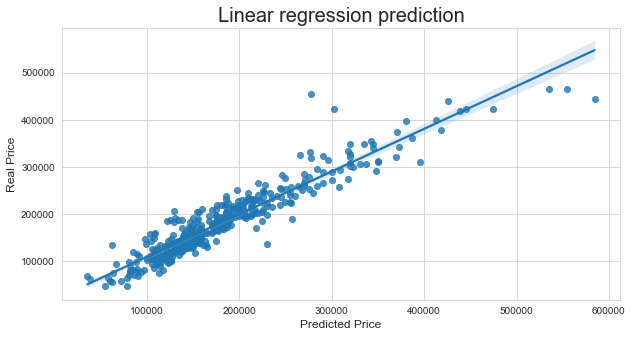

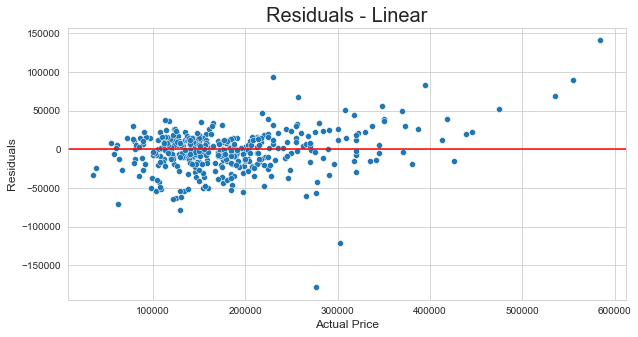

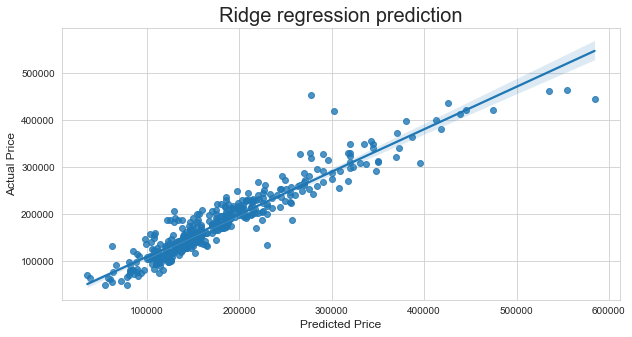

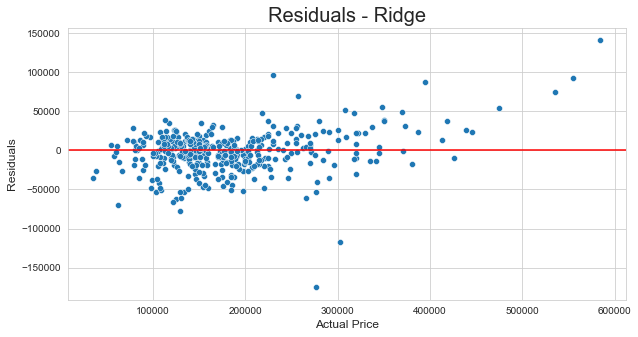

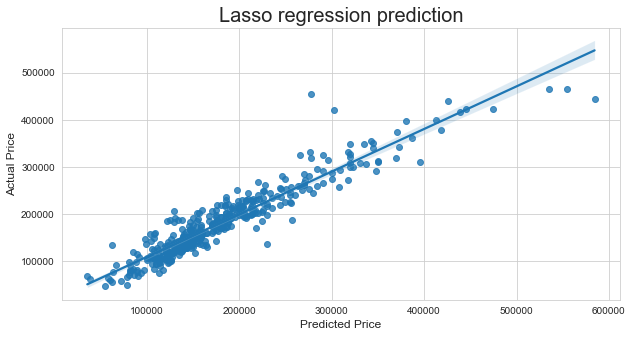

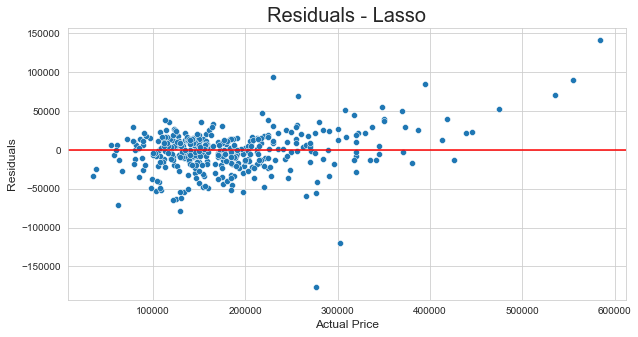

In [22]:
# dropping the features zeroed out in lasso


X_drop.extend(('totalbaths', 'gtype_Detchd'))

# new data frame so as to not overwrite original
newtrain = train.drop(
    X_drop,
    axis=1,
)

# generates new list of 30 features
new_X = list(
    np.abs(newtrain.corr()["saleprice"]).sort_values(ascending=False).index[1:31]
)

linear_reg(train[new_X], y, plotreg=True, plotresd=True)
ridge_reg(train[new_X], y, plotreg=True, plotresd=True)
lasso_reg(train[new_X], y, plotreg=True, plotresd=True) 

In [23]:
# at this point, there is not much improvement to scores
# final list of 30 features: 
new_X

['overallqual',
 'grlivarea',
 'kitchenqual',
 'totalbsmtsf',
 'garagearea',
 'bsmtqual',
 'age_blt',
 'garagefinish',
 'age_remod',
 'fireplacequ',
 'fd_PConc',
 'masvnrarea',
 'nhood_NridgHt',
 'bsmtfinsf1',
 'overallqual_kitchenqual',
 'bsmtexposure',
 'mvtype_None',
 'totalporch',
 'newhouse',
 'gtype_Attchd',
 'fd_CBlock',
 'bsmtfintype1',
 'mvtype_Stone',
 'overallqual^2',
 'lotarea',
 'lotshape',
 'paveddrive',
 'garagequal',
 'centralair',
 'rstyle_Hip']

In [24]:
result = linear_test(train[new_X], y, test[new_X])
result.to_csv('datasets/lr_v2.csv', index=False)
result = ridge_test(train[new_X], y, test[new_X])
result.to_csv('datasets/ridge_v2.csv', index=False)
result = lasso_test(train[new_X], y, test[new_X])
result.to_csv('datasets/lasso_v2.csv', index=False)

Optimal Ridge Alpha:  27.049597304631355
Optimal Lasso Alpha:  63.70909657838938


### RMSE Scores on Kaggle: 

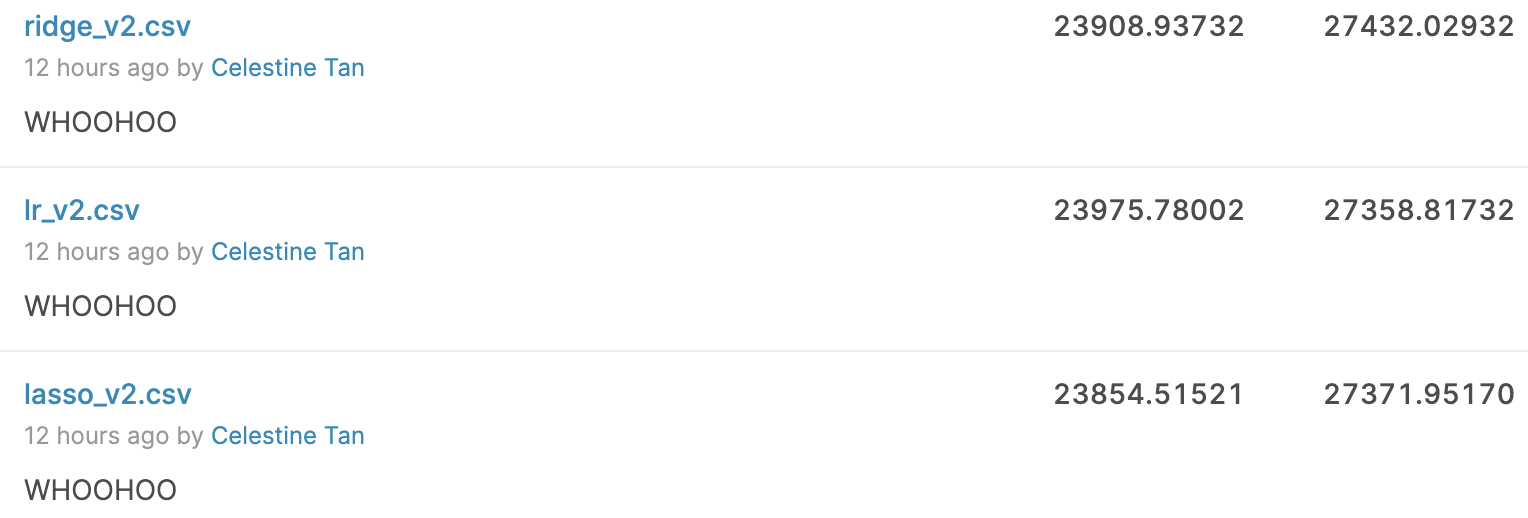

## Feature selection - Manual Selection

After automated feature selection, the model scores at best hover below 0.9. 

We can explore manual selection features, to remove noise / examine collinearity.

### Iteration 3 - Dropping collinear features from iteration 2

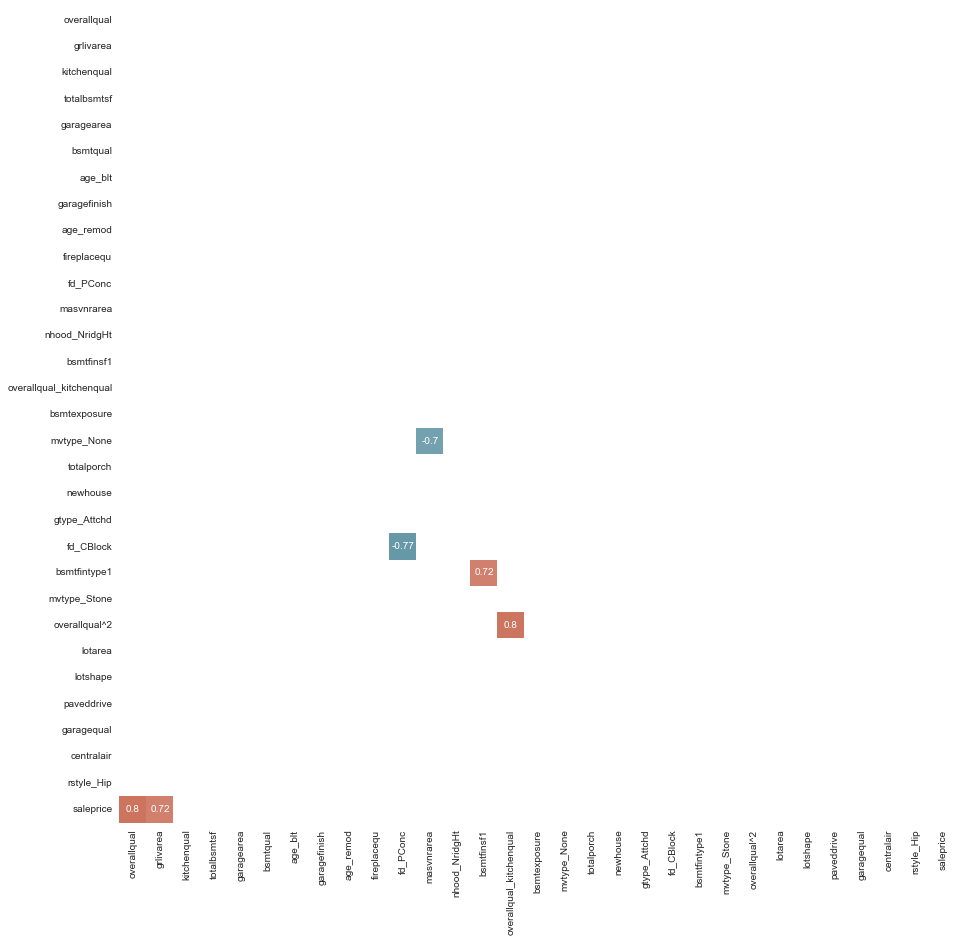

In [25]:
# finding multicollinear features by restricting correlation to those above 0.8 (else there will be too many)

plt.figure(figsize=(15, 15))

corr = train[new_X].join(train['saleprice']).corr()
corr = corr[abs(corr) >= 0.7]

matrix = np.triu(corr)
sns.heatmap(
    corr,
    annot=True,
    mask=matrix,
    vmin=-1,
    vmax=1,
    cbar=False,
    cmap=(sns.diverging_palette(220, 20, as_cmap=True)),
)

plt.show()

Linear Regression cross val score: [0.9102017  0.91681734 0.91054939 0.88727377 0.84286855 0.91257086
 0.89957176 0.8948369  0.87332272 0.8884205 ]
Linear Regression cross val average: 0.8936433494157713
Linear Regression cross val S.D: 0.021332383765351827

Linear Regression prediction score: 0.8867691823716192
RMSE: 27078.96033417494

Optimal alpha: 25.95024211399736
Ridge Regression cross val score: [0.90863683 0.91750347 0.91299629 0.88637938 0.84308343 0.91374808
 0.90073277 0.89331685 0.8768235  0.88700849]
Ridge Regression cross val average: 0.8940229085101677
Ridge Regression cross val S.D: 0.021348936982743233

Ridge Regression prediction score: 0.8878305882429399
RMSE: 26951.744790230143

Optimal alpha: 63.10354623132004
Lasso Regression cross val score: [0.90981334 0.91688043 0.91071027 0.88699299 0.84142791 0.9131516
 0.90032194 0.89472681 0.87389243 0.88830698]
Lasso Regression cross val average: 0.8936224704174691
Lasso Regression cross val S.D: 0.021698640252663527

Lass

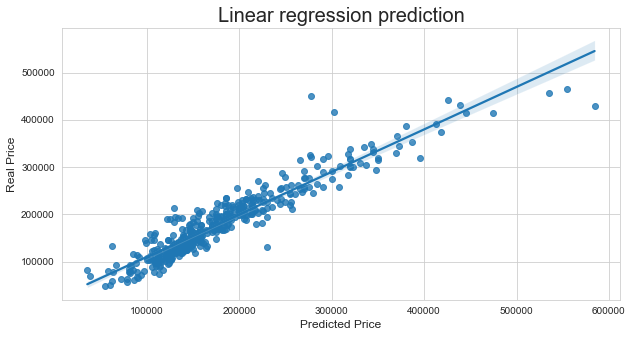

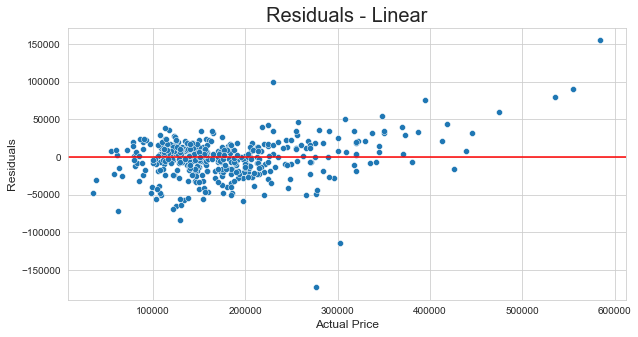

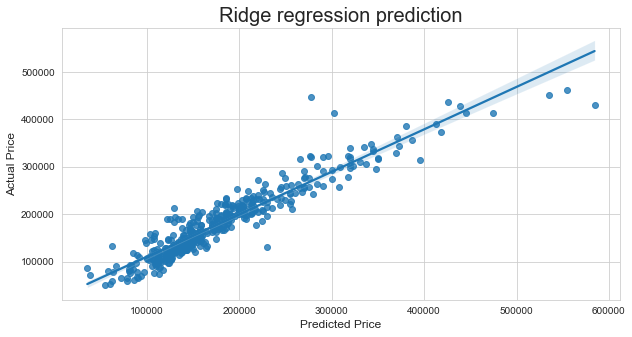

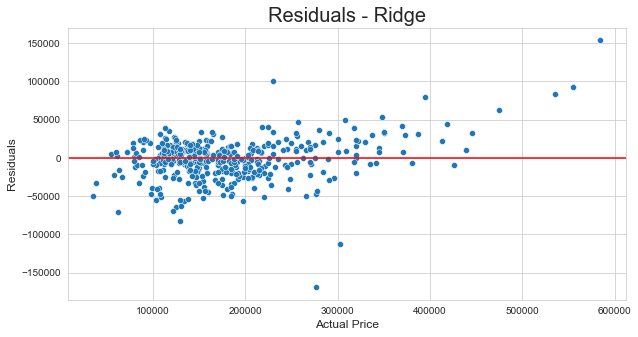

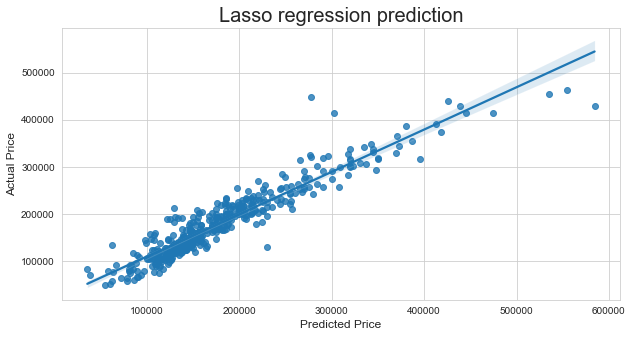

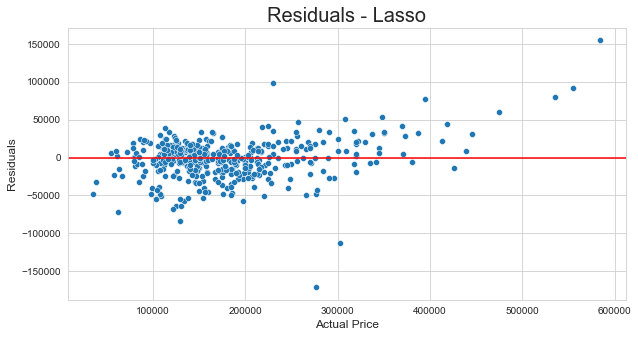

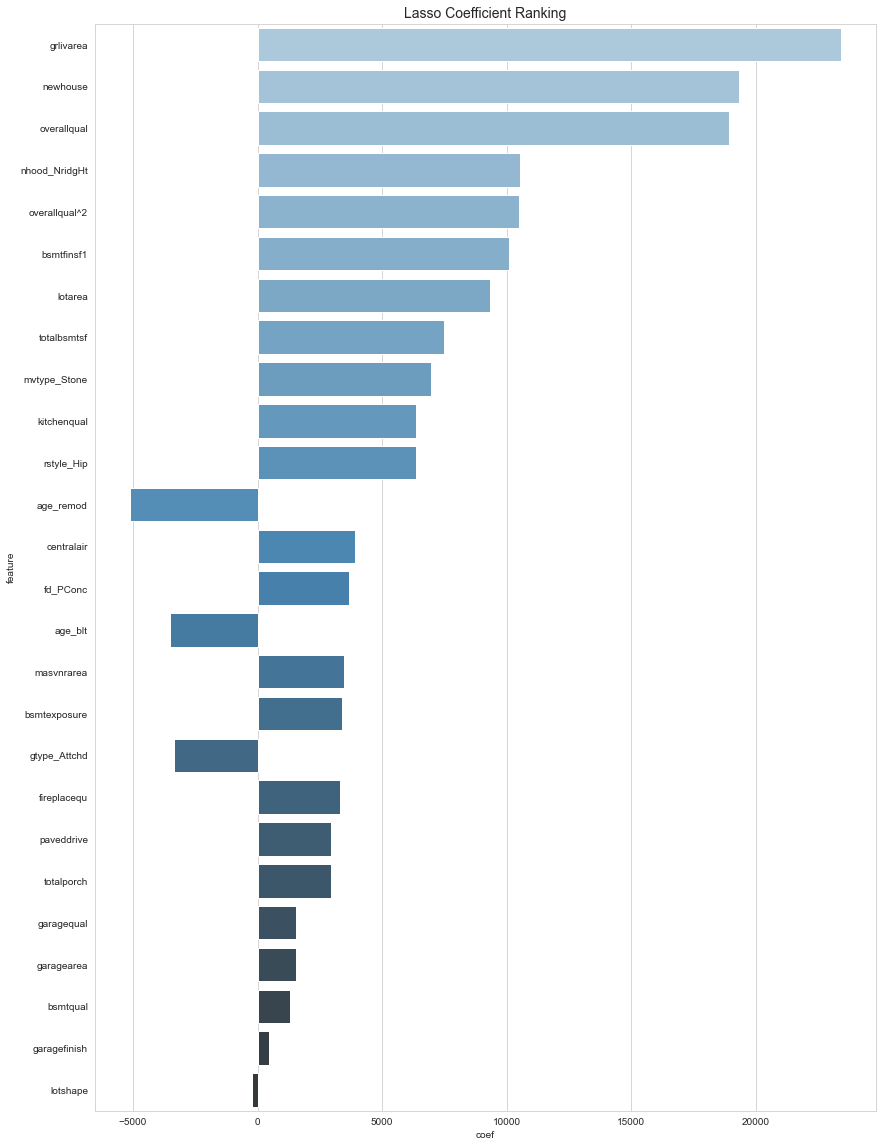

In [26]:
# dropping the multicollinear features 

X_drop.extend(('fd_CBlock', 'mvtype_None', 'bsmtfintype1', 'overallqual_kitchenqual'))
X_drop = ['fd_CBlock', 'mvtype_None', 'bsmtfintype1', 'overallqual_kitchenqual']

# new data frame so as to not overwrite original
newtrain = train.drop(
    X_drop,
    axis=1,
)

new_X = [i for i in new_X if i not in X_drop]

# new_X = list(np.abs(newtrain.corr()["saleprice"]).sort_values(ascending=False).index[1:31])

linear_reg(train[new_X], y, plotreg=True, plotresd=True)
ridge_reg(train[new_X], y, plotreg=True, plotresd=True)
lasso_reg(train[new_X], y, plotreg=True, plotresd=True, plotcf=True) 

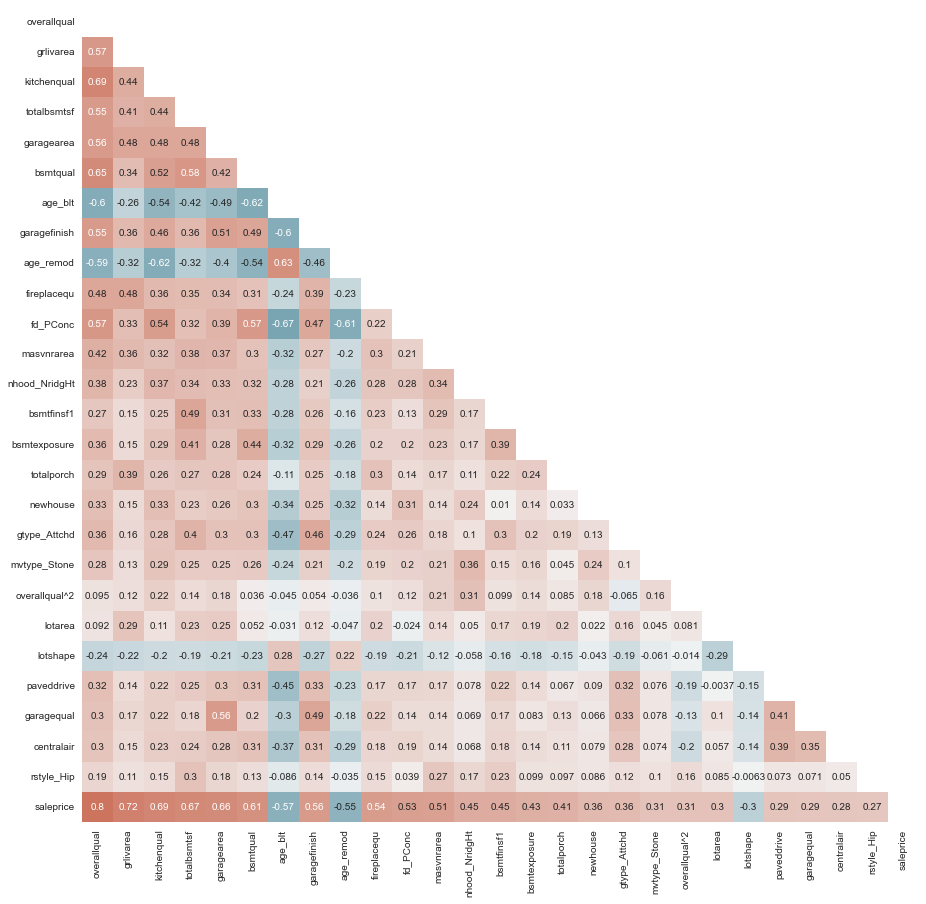

<Figure size 432x288 with 0 Axes>

In [27]:
# Look at highest correlated features 

plt.figure(figsize=(15, 15))

corr = train[new_X].join(train['saleprice']).corr()

matrix = np.triu(corr)
sns.heatmap(
    corr,
    annot=True,
    mask=matrix,
    vmin=-1,
    vmax=1,
    cbar=False,
    cmap=(sns.diverging_palette(220, 20, as_cmap=True)),
)

plt.show()

plt.tight_layout()
plt.savefig('images/final_heatmap.png', transparent=True)

In [28]:
# List of features passed into final model
new_X

['overallqual',
 'grlivarea',
 'kitchenqual',
 'totalbsmtsf',
 'garagearea',
 'bsmtqual',
 'age_blt',
 'garagefinish',
 'age_remod',
 'fireplacequ',
 'fd_PConc',
 'masvnrarea',
 'nhood_NridgHt',
 'bsmtfinsf1',
 'bsmtexposure',
 'totalporch',
 'newhouse',
 'gtype_Attchd',
 'mvtype_Stone',
 'overallqual^2',
 'lotarea',
 'lotshape',
 'paveddrive',
 'garagequal',
 'centralair',
 'rstyle_Hip']

In [29]:
result = linear_test(train[new_X], y, test[new_X])
result.to_csv('datasets/lr_v3.csv', index=False)
result = ridge_test(train[new_X], y, test[new_X])
result.to_csv('datasets/ridge_v3.csv', index=False)
result = lasso_test(train[new_X], y, test[new_X])
result.to_csv('datasets/lasso_v3.csv', index=False)

Optimal Ridge Alpha:  25.52908068239518
Optimal Lasso Alpha:  63.70909657838938


### RMSE Scores on Kaggle: 


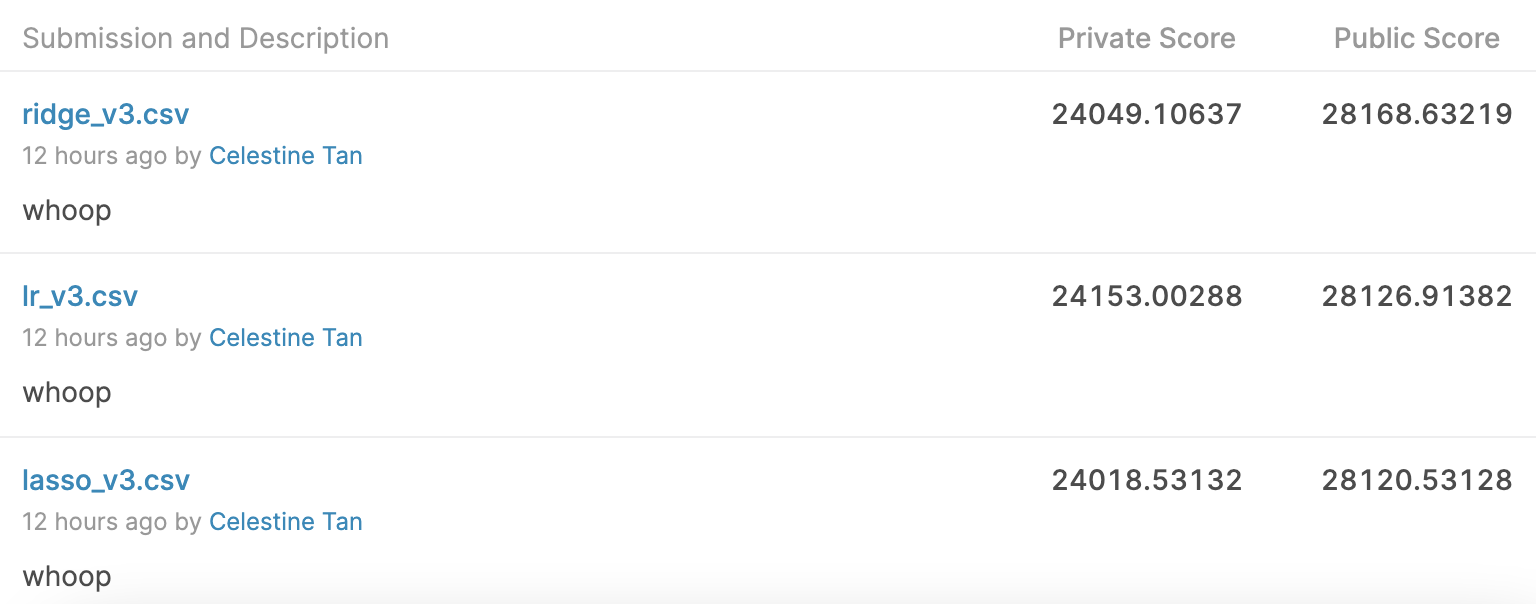

### Summary of all models

Model Name | Training Score | Testing Score | RMSE
-|-|-|-
Baseline/Null Model|0%|0%|80,473
Linear Regression (Overfit)|90.5%|89.8%|25,746
Ridge (with interaction)|89.8%|89.2%|26,476
Lasso (with interation)|89.7%|89.1%|26,562
Lasso Regression (Dropping collinear features)|89.4%|88.4%|27,000

<a id='link4'></a>

# Conclusions and Recommendations

### Analysis of Final Model

Optimal alpha: 63.10354623132004
Lasso Regression cross val score: [0.90981334 0.91688043 0.91071027 0.88699299 0.84142791 0.9131516
 0.90032194 0.89472681 0.87389243 0.88830698]
Lasso Regression cross val average: 0.8936224704174691
Lasso Regression cross val S.D: 0.021698640252663527

Lasso Regression prediction score: 0.887421652443743
RMSE: 27000.82905525856

Num features zeroed out: 0
Percent features zeroed out: 0%
Features zeroed out: Index([], dtype='object')



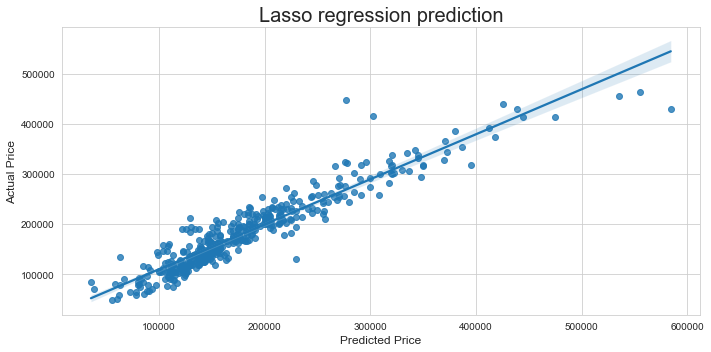

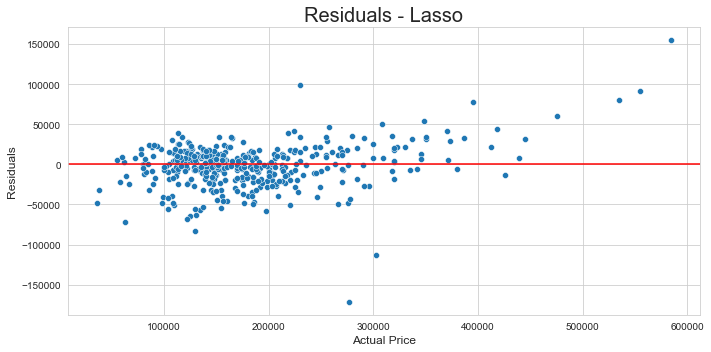

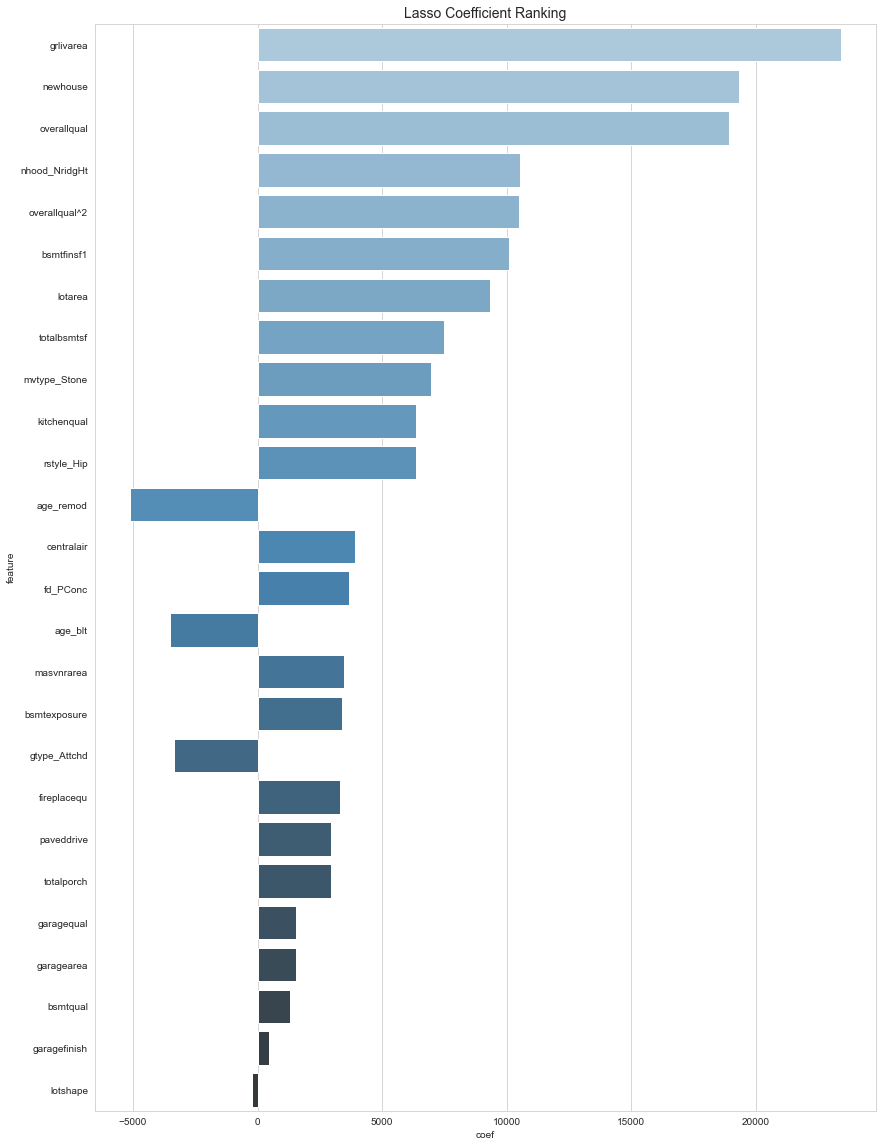

In [30]:
lasso_reg(train[new_X], y, plotreg=True, plotresd=True, plotcf=True, save=True) 

We have chosen the 3rd iteration of Lasso although RMSE score is slightly higher, as we do not want the data to be overfit with multi-collinear variables. Looking at the regression plot, we can see that the line passes through most data points. 

At higher prices, namely those above 300,000USD we can see that there are a couple of data points that lie outside the confidence interval, suggesting that our model might not be accurate when predicting houses of very high values. This is mirrored by the residual plots - at house prices below 300,000USD there is an equal number of residuals on both sides of the line.

However, these high value houses only represent 8% of the entire dataset. They are quite rare, and for the general population wanting to sell their house, the model would still work relatively well.

The regression models are far from perfect, but is able to account for about 88.7% of the variation in sale price, and able to predict the prices within approximately 27,000USD.

In [31]:
# % of houses above $300,000
train[train['saleprice']>300000].shape[0] / train.shape[0] * 100

8.0078125

### Recommendations

Looking at the features for the predictive models, the top few features seems plausible. For example, living area and overall quantity are features that are commonly known to affect sales price. Similarly, new houses tend to be postiviely correlated with sales prices as well. 

With respect to prospective sellers, they should take the valuations from this model with a pinch of salt as it only explains 88.7% of the variation with relation to price. To err on the side of caution, they could add 27,000 USD to the price generated, to account for negotiations from prospective buyers as well. If the prices generated are above 350,000 USD, they probably should get a realtor for a physical valuation instead.

In addition, if people are looking for property investments, here are some things they could look out for (assuming living area and quality cannot be controlled): 

- Properties in Northridge Heights
- Stone masonry veneer type houses
- Ensure garages are not attached 
- Houses with a porch
- Newer houses
- Foundation made from poured concrete 
- Central air conditioning

### Model Limitations & Improvements

#### Limitations
- There were many null values that were imputed based on highest value counts, which might not be an accurate reflection of the true data
- Model would be more accurate with more features/interaction terms, however this would make it less interpretable to the target audience

#### Improvements
- To consider a separate model that drops the house price of above 300,000. We could also examine what are the factors important to houses above 300,000
- Taking into account inflation of house prices, as our data set was collected over a few years